# Tutorial 5 - Language Translation with Word Level seq2seq DL Models
The objective is to convert a German sentence (sequence of words) to English using a Neural Machine Translation (NMT) system based on word level encoder-decoder models.

<img src="https://i.imgur.com/So32H7U.png">

We will use German-English sentence pairs data from http://www.manythings.org/anki/

Sequence-to-Sequence (seq2seq) models are used for a variety of NLP tasks, such as text summarization, speech recognition, language translation, text-to-speech, speech-to-text among others. Our aim is to translate german to english sentences.

Here, both, the input and output are sentences. In other words, these sentences are a sequence of words going in and out of our model.

<img src="https://i.imgur.com/Uk1tCPo.png">

A typical seq2seq model is also known as an encoder-decoder model and has 2 major components:

+ The encoder
+ The decoder

Both these parts are essentially two different sequential models like RNNs\LSTMs which are combined together.

<img src="https://i.imgur.com/bT6PAtv.png">

## Download Dataset

In [10]:
!wget http://www.manythings.org/anki/deu-eng.zip
!unzip -f deu-eng.zip


--2021-07-23 00:55:34--  http://www.manythings.org/anki/deu-eng.zip
Resolving www.manythings.org (www.manythings.org)... 172.67.186.54, 104.21.92.44, 2606:4700:3033::ac43:ba36, ...
Connecting to www.manythings.org (www.manythings.org)|172.67.186.54|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9079830 (8.7M) [application/zip]
Saving to: ‘deu-eng.zip.3’

deu-eng.zip.3       100%[===================>]   8.66M  30.1MB/s    in 0.3s    

2021-07-23 00:55:34 (30.1 MB/s) - ‘deu-eng.zip.3’ saved [9079830/9079830]

Archive:  deu-eng.zip
total 72284
-rw-r--r-- 1 root root     1441 Jul 14 10:16 _about.txt
-rw-r--r-- 1 root root  9079830 Jul 14 01:16 deu-eng.zip
-rw-r--r-- 1 root root  9079830 Jul 14 01:16 deu-eng.zip.1
-rw-r--r-- 1 root root  9079830 Jul 14 01:16 deu-eng.zip.2
-rw-r--r-- 1 root root  9079830 Jul 14 01:16 deu-eng.zip.3
-rw-r--r-- 1 root root 37686235 Jul 14 10:16 deu.txt
drwxr-xr-x 1 root root     4096 Jul 16 13:20 sample_data


In [23]:

!ls -l 


total 72288
-rw-r--r-- 1 root root     1441 Jul 14 10:16 _about.txt
-rw-r--r-- 1 root root  9079830 Jul 14 01:16 deu-eng.zip
-rw-r--r-- 1 root root  9079830 Jul 14 01:16 deu-eng.zip.1
-rw-r--r-- 1 root root  9079830 Jul 14 01:16 deu-eng.zip.2
-rw-r--r-- 1 root root  9079830 Jul 14 01:16 deu-eng.zip.3
-rw-r--r-- 1 root root 37686235 Jul 14 10:16 deu.txt
drwx------ 5 root root     4096 Jul 23 01:04 drive
drwxr-xr-x 1 root root     4096 Jul 16 13:20 sample_data


In [16]:
import os 
os.getcwd()
print(os.listdir())

['.config', 'deu-eng.zip.3', '_about.txt', 'deu-eng.zip.2', 'deu-eng.zip.1', 'deu.txt', 'deu-eng.zip', 'drive', 'sample_data']


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
# drive.flush_and_unmount()

## Load Dataset

In [24]:
import numpy as np

FILE_NAME = './deu.txt'
with open(FILE_NAME, mode='rt', encoding='utf-8') as infile:
  data = infile.read()
  sentences = data.strip().split('\n')
  sentences = [item.split('\t') for item in sentences]
  eng_deu = np.array(sentences)

eng_deu = eng_deu[:50000] # 
eng_deu

array([['Go.', 'Geh.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8597805 (Roujin)'],
       ['Hi.', 'Hallo!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #380701 (cburgmer)'],
       ['Hi.', 'Grüß Gott!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #659813 (Esperantostern)'],
       ...,
       ['We took a wrong turn.', 'Wir sind falsch abgebogen.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #823901 (jellorage) & #2112094 (freddy1)'],
       ['We traveled together.', 'Wir waren zusammen auf Reisen.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #1582121 (Spamster) & #1600396 (Pfirsichbaeumchen)'],
       ['We traveled together.', 'Wir sind zusammen gereist.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #1582121 (Spamster) & #1600398 (Pfirsichbaeumchen)']],
      dtype='<U537')

In [25]:
deu = eng_deu[:,1]
eng = eng_deu[:,0]
eng, deu

(array(['Go.', 'Hi.', 'Hi.', ..., 'We took a wrong turn.',
        'We traveled together.', 'We traveled together.'], dtype='<U537'),
 array(['Geh.', 'Hallo!', 'Grüß Gott!', ..., 'Wir sind falsch abgebogen.',
        'Wir waren zusammen auf Reisen.', 'Wir sind zusammen gereist.'],
       dtype='<U537'))

## Basic Preprocessing

In [26]:
import string

# Remove punctuation and lowercase
eng = np.array([s.translate(str.maketrans('', '', string.punctuation)).lower() for s in eng])
deu = np.array([s.translate(str.maketrans('', '', string.punctuation)).lower() for s in deu])
eng, deu

(array(['go', 'hi', 'hi', ..., 'we took a wrong turn',
        'we traveled together', 'we traveled together'], dtype='<U20'),
 array(['geh', 'hallo', 'grüß gott', ..., 'wir sind falsch abgebogen',
        'wir waren zusammen auf reisen', 'wir sind zusammen gereist'],
       dtype='<U118'))

## Analyze Sentences

In [27]:
eng_len = [len(s.split()) for s in eng]
deu_len = [len(s.split()) for s in deu]

max(eng_len), max(deu_len)

(6, 15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa91046d390>,
      dtype=object)

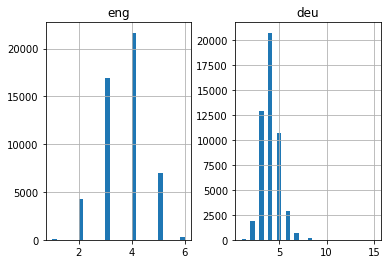

In [28]:
import pandas as pd
%matplotlib inline

length_df = pd.DataFrame({'eng':eng_len, 'deu':deu_len})
length_df.hist(bins=30)

## Transform Text to Sequence of Numbers

In [29]:
from tensorflow import keras

eng_tokenizer = keras.preprocessing.text.Tokenizer()
eng_tokenizer.fit_on_texts(eng)
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_length = max(eng_len)

In [32]:
print('Max eng text length:', eng_length)
print('English Vocabulary Size:', eng_vocab_size)

Max eng text length: 6
English Vocabulary Size: 6152


In [33]:
deu_tokenizer = keras.preprocessing.text.Tokenizer()
deu_tokenizer.fit_on_texts(deu)
deu_vocab_size = len(deu_tokenizer.word_index) + 1
deu_length = max(deu_len)

In [ ]:
print('Max deu text length:', deu_length)
print('German Vocabulary Size:', deu_vocab_size)

Max deu text length: 15
German Vocabulary Size: 10329


## Prepare Train Test Splits

In [34]:
from sklearn.model_selection import train_test_split

train_deu, test_deu, train_eng, test_eng = train_test_split(deu, eng, test_size=0.2, random_state = 42)
train_deu.shape, test_deu.shape, train_eng.shape, test_eng.shape

((40000,), (10000,), (40000,), (10000,))

## Normalize Sequence Lengths

We normalize sentence lengths by defining the maximum length. Larger sentences/sequences get truncated while smaller ones are padded.

In [36]:
train_deu_enc = deu_tokenizer.texts_to_sequences(train_deu)
train_deu_enc = keras.preprocessing.sequence.pad_sequences(train_deu_enc, maxlen=deu_length, padding='post')

train_eng_enc = eng_tokenizer.texts_to_sequences(train_eng)
train_eng_enc = keras.preprocessing.sequence.pad_sequences(train_eng_enc, maxlen=eng_length, padding='post')

train_deu_enc.shape, train_eng_enc.shape

((40000, 15), (40000, 6))

In [37]:
test_deu_enc = deu_tokenizer.texts_to_sequences(test_deu)
test_deu_enc = keras.preprocessing.sequence.pad_sequences(test_deu_enc, maxlen=deu_length, padding='post')

test_eng_enc = eng_tokenizer.texts_to_sequences(test_eng)
test_eng_enc = keras.preprocessing.sequence.pad_sequences(test_eng_enc, maxlen=eng_length, padding='post')

test_deu_enc.shape, test_eng_enc.shape

((10000, 15), (10000, 6))

## Build the Model

<img src="https://i.imgur.com/3ZVi97s.png">

+ For the encoder, we will use an embedding layer and an LSTM layer
+ For the decoder, we will use another LSTM layer followed by a dense layer
+ Repeat Vector helps pass the output sequence from encoder to all LSTM cells in the decoder

We leverage the full power of GPUs by using the CUDA variant of the LSTM models.

In [39]:
EMBEDDING_DIM = 512
LSTM_UNITS = 512

encoder_inputs = keras.layers.Input(shape=(deu_length,))
enc_emb =  keras.layers.Embedding(deu_vocab_size, EMBEDDING_DIM)(encoder_inputs)
encoder_lstm = keras.layers.LSTM(LSTM_UNITS)(enc_emb) # last hidden state = [512] x 7
rp_vec = keras.layers.RepeatVector(eng_length)(encoder_lstm)

decoder_lstm = keras.layers.LSTM(LSTM_UNITS, return_sequences=True)(rp_vec)
decoder_softmax = keras.layers.Dense(eng_vocab_size, activation='softmax')(decoder_lstm)
model = keras.models.Model(inputs=encoder_inputs, outputs=decoder_softmax)

model.compile(optimizer=keras.optimizers.RMSprop(lr=0.001), loss='sparse_categorical_crossentropy')
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 15)]              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 15, 512)           5177344   
_________________________________________________________________
lstm_2 (LSTM)                (None, 512)               2099200   
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 6, 512)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 6, 512)            2099200   
_________________________________________________________________
dense_1 (Dense)              (None, 6, 6152)           3155976   
Total params: 12,531,720
Trainable params: 12,531,720
Non-trainable params: 0
_______________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


## Train the Model

In [40]:
history = model.fit(train_deu_enc, train_eng_enc.reshape(train_eng_enc.shape[0], train_eng_enc.shape[1], 1), 
          epochs=50, batch_size=128, 
          validation_split = 0.1,
          verbose=1)

Epoch 1/50
282/282 [==============================] - 18s 40ms/step - loss: 3.7399 - val_loss: 3.4675
Epoch 2/50
282/282 [==============================] - 10s 36ms/step - loss: 3.2430 - val_loss: 3.0869
Epoch 3/50
282/282 [==============================] - 10s 36ms/step - loss: 2.8823 - val_loss: 2.8356
Epoch 4/50
282/282 [==============================] - 10s 35ms/step - loss: 2.6137 - val_loss: 2.6239
Epoch 5/50
282/282 [==============================] - 10s 35ms/step - loss: 2.3808 - val_loss: 2.4574
Epoch 6/50
282/282 [==============================] - 10s 35ms/step - loss: 2.1652 - val_loss: 2.2964
Epoch 7/50
282/282 [==============================] - 10s 36ms/step - loss: 1.9684 - val_loss: 2.1860
Epoch 8/50
282/282 [==============================] - 10s 35ms/step - loss: 1.7875 - val_loss: 2.0363
Epoch 9/50
282/282 [==============================] - 10s 35ms/step - loss: 1.6235 - val_loss: 1.9349
Epoch 10/50
282/282 [==============================] - 10s 36ms/step - loss: 1.471

## Visualize Training Progress

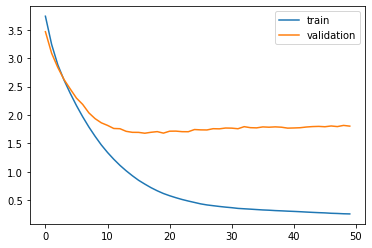

In [41]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])

## Text Generator
We build a utility function to generate text sequences based on the output prediction sequences

In [43]:
from tqdm import tqdm
pd.set_option('display.max_colwidth', 500)

eng_idx2word = {v:k for k, v in eng_tokenizer.word_index.items()}

def generate_prediction_texts(pred_seqs, idx2word_map):
  pred_texts = []

  for pred in tqdm(preds):
    temp = []
    for idx in range(len(pred)):
      w = eng_idx2word.get(pred[idx], None)
      if idx > 0:
        if (w == eng_idx2word.get(pred[idx-1], None)) or (w == None):
            temp.append('')
        else:
            temp.append(w)
          
      else:
        if(w == None):
            temp.append('')
        else:
            temp.append(w)            
        
    pred_texts.append(' '.join(temp))
  return pred_texts

## Translation using seed from Training Data

In [44]:
train_deu_enc[:1000,:].shape

(1000, 15)

In [45]:
pred_probs = model.predict(train_deu_enc[:1000,:].reshape((train_deu_enc[:1000,:].shape[0], 
                                                           train_deu_enc[:1000,:].shape[1])), verbose=1)
preds = [np.argmax(i, axis=1) for i in pred_probs]
# convert predictions into text (English)
pred_texts = generate_prediction_texts(pred_seqs=preds, idx2word_map=eng_idx2word)
pred_df = pd.DataFrame({'source': train_deu[:1000], 'target' : train_eng[:1000], 'predicted' : pred_texts})

32/32 [==============================] - 1s 5ms/step


100%|██████████| 1000/1000 [00:00<00:00, 68220.03it/s]


In [46]:
pred_df.head(50).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
source,passt auf euch auf,wir sehen uns später,ich weiß es mit sicherheit,hat tom euch geküsst,lassen sie mich tom anrufen,fehler sind unvermeidlich,dieses buch habe ich geschrieben,ich liebe boston sehr,ich weiß dass tom zu hause ist,ich bin schon dran,er muss tot sein,sind sie lehrer,sie werden schon klarkommen,lass uns hier lang gehen,wird es sehr weh tun,tom ist beunruhigt,sie lebten in boston,gib mir noch eins,ich weiß was ich fühle,tom hat mich sitzenlassen,kannst du reden,hören sie nicht auf sie,tom wird euch nichts in den weg legen,tom denkt logisch,können sie das beweisen,ich bin noch nicht fertig,hören sie auf zu fluchen,ich bin ein alter mann,tom möchte essen,ich habe davon gehört,tom schwimmt,tom will arbeiten,er hat ein scharfes gehör,hallo,du hast eine stunde zeit,ich nehme dieses,wir werden schon klarkommen,ich bin nicht sicher,tom ist schneller,wir sind zu fuß gegangen,das ist die volle wahrheit,tom trat als kandidat bei der wahl zum bürgermeister an,er kam spät an,rutsche ich,ich habe es nicht gehört,mein goldfisch ist gestorben,brauche ich eine rechtsanwältin,du hast ein gutes gedächtnis,du siehst toll aus,du brauchst einen spielhebel
target,look after yourself,ill see you later,i know it for a fact,did tom kiss you,let me call tom,mistakes happen,i wrote this book,i really love boston,i know tom is home,im already on it,he must be dead,are you a teacher,theyll be fine,lets go this way,will it hurt a lot,toms concerned,they lived in boston,give me another one,i know what i feel,tom dumped me,can you talk,dont listen to her,tom wont stop you,tom is logical,can you prove it,im not done,stop swearing,im an old man,tom wants to eat,i heard about it,tom is swimming,tom wants to work,he has sharp hearing,hi,youve got an hour,ill take this one,well be fine,im not sure,tom is quicker,we walked,its absolutely true,tom ran for mayor,he arrived late,am i slipping,i didnt hear it,my goldfish died,do i need a lawyer,your memory is good,you look great,you need a joystick
predicted,look after yourself,ill see you later,i know it for a fact,did tom kiss you,let me call tom,mistakes happen,i wrote this book,i really love boston,i know tom is home,im already on it,he must be dead,are you a teacher,theyll be fine,lets go this way,will it hurt a lot,toms is,they lived in boston,give me another one,i know what i feel,tom dumped out on me,can you talk,dont listen to her,tom wont stop you,tom is wasnt,can you prove it,im not ready yet,stop swearing,im an old man,tom wants to eat,i heard about it,toms swimming,tom wants to work,he has sharp hearing,hi,you have one hour,ill take this one,well be fine,im not sure,tom is ate,we walked on foot,its the true,tom ran for mayor,he arrived late,am i wasnt,i didnt hear it,my died,do i need a lawyer,your memory is good,you look great,you need a joystick


## Translation on Test Data

In [50]:
pred_probs = model.predict(test_deu_enc[:1000,:].reshape((test_deu_enc[:1000,:].shape[0],
                                                          test_deu_enc[:1000,:].shape[1])), verbose=1)
preds = [np.argmax(i, axis=1) for i in pred_probs]
# convert predictions into text (English)
pred_texts = generate_prediction_texts(pred_seqs=preds, idx2word_map=eng_idx2word)
pred_df = pd.DataFrame({'source': test_deu[:1000], 'target' : test_eng[:1000], 'predicted' : pred_texts})

32/32 [==============================] - 0s 4ms/step


100%|██████████| 1000/1000 [00:00<00:00, 76537.00it/s]


In [51]:
pred_df.head(50).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
source,tom ist kein neuling,es war nicht schwer,er ist gegangen,das gefällt mir nicht,lesen sie das buch vor,du musst nach hause,tom war höflich,tom rannte los,ich bin kellner,ich bin in london angekommen,lass mich dir helfen,es ist eiskalt,ich war am arbeiten,ich bin ein junge,es ist zappenduster,gib mir diesen besen,tom wollte das haben,wir haben uns umgesehen,ich kenne sie alle,er ist ein medium,ich sehe eine maus,du hast meinen tag gerettet,ich habe dich gesehen,tom roch gas,es wird keine rolle spielen,tom ist sehr offenherzig,was habe ich falsch gemacht,ich hoffe es gefällt dir,ich will nicht weinen,tom starb an krebs,er hat weise gehandelt,ich bin nicht austauschbar,komm hier raus,ich esse käse,ich bin mir sicher dass ich helfen kann,wir können das gut,tom macht sich zu viele sorgen,wo sind die akten,diese tür will nicht aufgehen,wir rufen dich,tom war streitlustig,komm da raus,es war meine absicht,ich bin damit zufrieden,ich weiß dass du mich liebst,tom braucht bares,tom ist ein städter,tom ist gesellig,sie können mich nicht entlassen,ich habe brave kinder
target,tom isnt a rookie,it wasnt hard,he left,i dont like it,read the book aloud,you have to go home,tom was polite,tom took off running,im a waiter,i arrived in london,allow me to help you,it is freezing cold,i was working,i am a boy,it is pitch dark,hand me that broom,tom wanted that,we looked about us,i know them all,he is a psychic,i see a mouse,you made my day,i saw you,tom smelled gas,it wont matter,tom is very frank,what did i do wrong,i hope you like it,i dont want to cry,tom died of cancer,he has acted wisely,im irreplaceable,come out here,i eat cheese,im sure i can help,were good at it,tom worries too much,where are the files,that door wont open,well call you,tom was belligerent,come out of there,it was my plan,im happy with that,i know you love me,tom needs some cash,tom is a townie,tom is gregarious,you cant fire me,i have good kids
predicted,tom isnt a,it wasnt hard,he left,i dont like it,read the book aloud,you need to home,tom was courteous,tom ran back,im a waiter,im arrived in isnt,let me help,its freezing,i was to,im am boy,it a has,give me that thing,tom wanted this know,we have up other,i know all of,hes a feel,i need a mouse,you took my cold,i saw you,tom cant my,it no matter mind,tom is very really,what did i wrong,i hope you like it,i dont want to cry,tom died of cancer,he has have,im not like,get down of,i am some lot,im glad i see,we can fine well,tom is too fat,where are the from,this dont wont this,well call you,tom was not,get out of there,it was my decision,im it,i know you like me,tom needs nobody,tom is a gang,tom is made,they cant fire me,i have children


In [52]:
pred_df.iloc[500:550].T

,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549
source,ich verdanke dir so viel,sie dürfen gehen,tom ist schnell,tom saß neben maria,nehmen sie noch einen,probieren sie die hier an,folge deinem verlangen,ich war traurig,tom ist verärgert,halt die klappe und hör zu,tom überlebte,ich habe tom dort gesehen,vielleicht wird es bald regnen,ich werde dir nicht helfen,wir haben gerade erst angefangen,sie werden nicht erschossen,tom ist impulsiv,tom ist telepath,lass tom nachhause gehen,das fleisch ist zäh,ich kann gut sehen,die katzen sind in sicherheit,das ist nicht toms auto,tom ist ein überlebenskünstler,das war ein fehler,wir haben geklatscht,ich glaube an tom,ich nehme es an,ist das zu schwierig,ich bin der beste,das ist nicht von mir,ich bin erste,ich habe es umsonst bekommen,ich kenne tom bereits,ich habe sie schreien gehört,seid ihr glücklich,meine socken sind nass,könnt ihr französisch sprechen,hier können wir nicht reden,tom fühlte sich ausgeschlossen,tom ist geblieben,isst du gerne maisgrütze,ich bat um seine hilfe,seid alle ruhig,ich will zurückgehen,die kiste ist voll,tom hat euren wagen gestohlen,das sind alles touristen,ich trat in die marine ein,nur eine minute
target,i owe you so much,youre free to go,tom is fast,tom sat next to mary,have another,try these on,follow your desire,i was feeling blue,tom is resentful,shut up and listen,tom survived,i saw tom in there,it may rain soon,i will not help you,we just got started,they wont be shot,tom is impulsive,tom is a telepath,let tom go home,the meat is tough,i have good eyes,the cats are safe,this isnt toms car,tom is a survivalist,that was a mistake,we applauded,i believe in tom,i suppose so,is that too hard,im the best,its not from me,im first,i got it for free,i already know tom,i heard you scream,are you guys happy,my socks are wet,can you speak french,we cant talk here,tom felt excluded,tom stayed,do you like grits,i asked for his help,be quiet all of you,i want to go back,the box is full,tom stole your car,theyre all tourists,i joined the navy,just a minute
predicted,i owe you a me,you may go,toms fast,tom sat with mary,have another,try these,follow your these,i was sad,toms is,shut up and listen,tom survived,i saw tom there,maybe it be tomorrow,i wont help you,we just got started,they wont be,toms is,tom is has,let tom go home,the life is hard,i have good eyesight,the cats are now,this toms car,tom is a hurt,it was a mistake,we have need,i believe tom,ill take it up,is this too hard,im the best,this not me,im first,i got it for free,i already know tom,i heard you scream,are you happy,my have are,can you speak french,we cant talk here,tom felt worried,tom toms,do you like apples,i asked him to help,is all,i want to go back,the box is full,tom stole your car,theyre listen,i took on a,just a minute
